In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data

In [2]:
from sklearn import mixture as mix

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
#import sklearn
#print (sklearn.__version__)

In [33]:
end = dt.date.today()
start = dt.datetime(end.year-5,end.month,end.day)
df = pd.DataFrame(data.DataReader('BSE/BOM532500', 'quandl', start=start, end=end ))  #Maruti Ltd.
df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-09-26,8085.00,8085.05,7811.00,7844.40,7891.940000,59593.0,7820.0,4.703044e+08,23589.0,39.58,274.05,-240.60
2018-09-25,7800.00,8017.60,7681.05,8003.30,7885.910000,91761.0,11164.0,7.236188e+08,26796.0,29.20,336.55,203.30
2018-09-24,8100.00,8100.00,7610.85,7795.85,7753.200000,166197.0,20924.0,1.288558e+09,70014.0,42.13,489.15,-304.15
2018-09-21,8241.30,8320.00,7589.50,8039.55,8085.400000,160887.0,18987.0,1.300836e+09,63853.0,39.69,730.50,-201.75
2018-09-19,8425.00,8448.80,8192.00,8207.00,8297.780000,129945.0,16186.0,1.078254e+09,73520.0,56.58,256.80,-218.00
2018-09-18,8549.90,8594.95,8383.25,8400.10,8481.300000,116135.0,4941.0,9.849755e+08,89177.0,76.79,211.70,-149.80
2018-09-17,8598.00,8652.00,8505.00,8533.50,8572.710000,34281.0,3620.0,2.938811e+08,14038.0,40.95,147.00,-64.50
2018-09-14,8581.00,8699.55,8581.00,8632.85,8651.090000,38845.0,4970.0,3.360516e+08,16379.0,42.17,118.55,51.85
2018-09-12,8549.00,8549.00,8401.00,8502.10,8473.870000,52065.0,8362.0,4.411920e+08,18798.0,36.10,148.00,-46.90


In [37]:
df = df[['Open', 'High', 'Low', 'Close']]
df.describe()

,Open,High,Low,Close
count,1213.000000,1213.000000,1213.000000,1213.000000
mean,5019.724485,5067.051649,4972.648269,5018.168425
std,2416.518922,2431.614526,2398.425073,2412.749097
min,1365.000000,1368.000000,1341.800000,1357.950000
25%,3379.750000,3414.000000,3348.500000,3382.150000
50%,4383.000000,4446.400000,4345.000000,4379.850000
75%,7207.000000,7249.300000,7155.000000,7214.900000
max,9970.000000,10000.000000,9730.050000,9820.350000


In [38]:
#Spliting the data 80% for testing and 20% for training
n = 10
t = 0.8
split = int(t*len(df))
print(split)

970


In [40]:
# print(df['High'][:split])
# print(df['High'].shift(1))
#I created various technical indicators such as, RSI, SMA, ADX, Correlation, 
#Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

# df['High'] = df['High'].shift(1)
# df['Low'] = df['Low'].shift(1)
# df['Close'] = df['Close'].shift(1)
df['RSI']= ta.RSI(np.array(df['Close']), timeperiod=n)
df['SMA']= df['Close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR']= ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['ADX']= ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']), timeperiod=n)
df['Return']= np.log(df['Open']/df['Open'].shift(1))

df = df.dropna()
df


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Open,High,Low,Close,RSI,SMA,Corr,SAR,ADX,Return
Date,,,,,,,,,,
2018-07-30,9320.00,9400.00,9235.00,9380.65,52.176026,9277.380,0.662471,9222.000000,20.833216,-0.006950
2018-07-27,9430.00,9444.00,9292.00,9315.45,48.647614,9293.790,0.536948,9235.000000,21.037576,0.011733
2018-07-26,9833.00,9833.00,9369.05,9396.65,53.041866,9317.815,0.491964,9235.000000,24.099732,0.041848
2018-07-25,9869.90,9875.00,9705.00,9757.70,66.995026,9372.635,0.706296,9292.000000,27.062825,0.003746
2018-07-24,9770.00,9922.85,9730.05,9820.35,68.783401,9414.990,0.882705,9369.050000,29.967687,-0.010173
2018-07-23,9415.00,9750.00,9380.15,9697.15,61.501991,9455.970,0.880829,9922.850000,27.979677,-0.037012
2018-07-20,9355.00,9458.95,9331.80,9386.75,47.442544,9475.810,0.644513,9922.850000,25.713741,-0.006393
2018-07-19,9388.00,9431.95,9350.10,9388.40,47.513411,9498.980,0.353607,9804.640000,23.674398,0.003521
2018-07-18,9482.00,9528.50,9300.00,9368.70,46.678445,9501.820,0.110385,9710.072000,22.752276,0.009963


# Standard Scaler

c:\program files (x86)\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


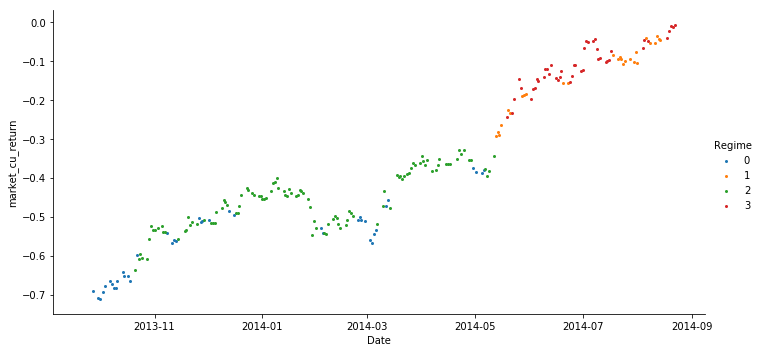

Mean for regime 0: -0.7477521550350693
Co-Variance for regime 0: 0.24466466552601007
Mean for regime 1: 0.7607191782573698
Co-Variance for regime 1: 0.23911864634298338
Mean for regime 2: -0.6207696819227542
Co-Variance for regime 2: 0.47960457320824224
Mean for regime 3: 1.4655768745179314
Co-Variance for regime 3: 0.36369481716222596


In [41]:
ss = StandardScaler()
unsup = mix.GaussianMixture(n_components=4,covariance_type='spherical', n_init=100, random_state=42)
#df = df.drop(['High','Low','Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime=unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))
Regimes= pd.DataFrame(regime, columns=['Regime'],index=df[split:].index).join(df[split:], how='inner').assign(market_cu_return=df[split:].Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

orders=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=orders, aspect=2, size=5)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()
plt.show()

for i in orders:
    print("Mean for regime %i:"%i,unsup.means_[i][0])
    print('Co-Variance for regime %i:'%i,(unsup.covariances_[i]))

In [52]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime','Date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal'] = 1
Regimes.loc[Regimes['Return']<0, 'Signal'] = -1

In [53]:
cls = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [54]:
split2 = int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'Date'], axis=1)
y = Regimes['Signal']
cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
print(len(X))
p_data = len(X)-split2
print(p_data)

224
45


In [56]:
df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')] = cls.predict(X[split2:])
print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

Date
2013-12-03    1
2013-12-02    1
2013-11-29    1
2013-11-28    1
2013-11-27    1
2013-11-26    1
2013-11-25    1
2013-11-22    1
2013-11-21    1
2013-11-20    1
2013-11-19    1
2013-11-18    1
2013-11-14    1
2013-11-13    1
2013-11-12    1
2013-11-11    1
2013-11-08    1
2013-11-07    1
2013-11-06    1
2013-11-05    1
2013-11-03    1
2013-11-01    1
2013-10-31    1
2013-10-30    1
2013-10-29    1
2013-10-28    1
2013-10-25    1
2013-10-24    1
2013-10-23    1
2013-10-22    1
2013-10-21    1
2013-10-18    1
2013-10-17    1
2013-10-15    1
2013-10-14    1
2013-10-11    1
2013-10-10    1
2013-10-09    1
2013-10-08    1
2013-10-07    1
2013-10-04    1
2013-10-03    1
2013-10-01    1
2013-09-30    1
2013-09-27    1
Name: Pred_Signal, dtype: int64


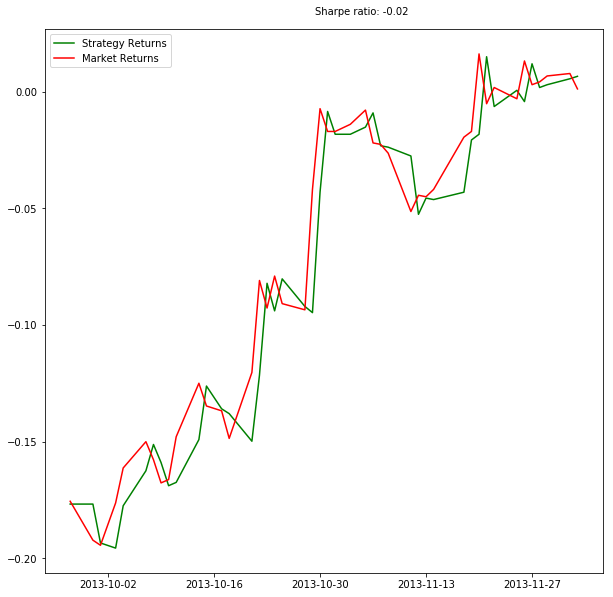

In [57]:
df['strategy_cu_return']=0
df['market_cu_return']=0
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])/np.nanstd(df['strategy_cu_return'][-p_data:])
df.dropna()

fig= plt.subplots(figsize = (10,10))
plt.plot(df['strategy_cu_return'][-p_data:], color='g', label='Strategy Returns')
plt.plot(df['market_cu_return'][-p_data:], color='r', label='Market Returns')
plt.figtext(0.5,0.9, s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()